Primi 5 record:


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0



Informazioni generali sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None


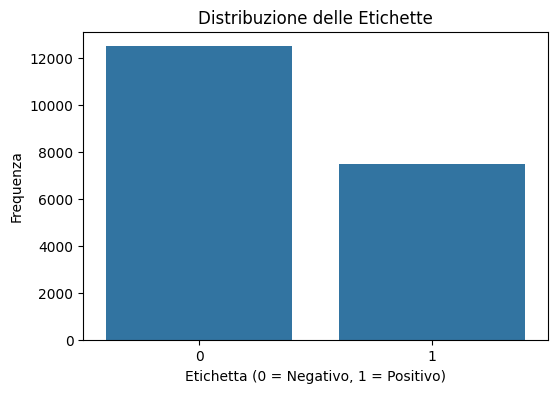

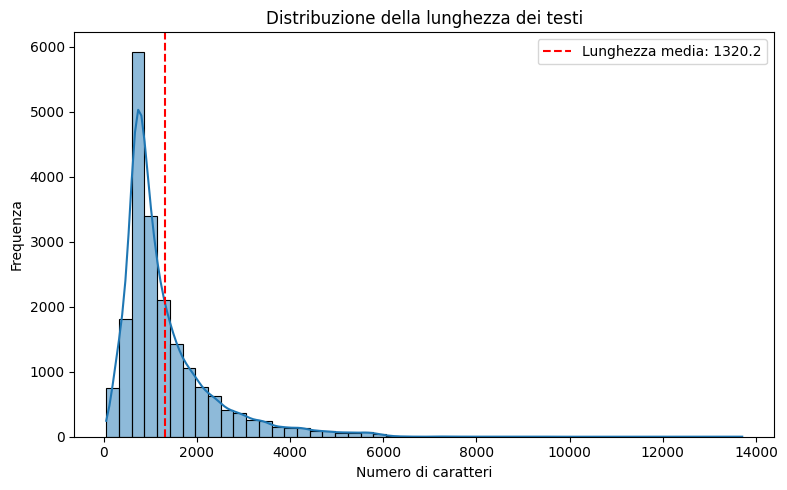


Lunghezza minima: 52
Lunghezza massima: 13704
Lunghezza media: 1320.2 caratteri


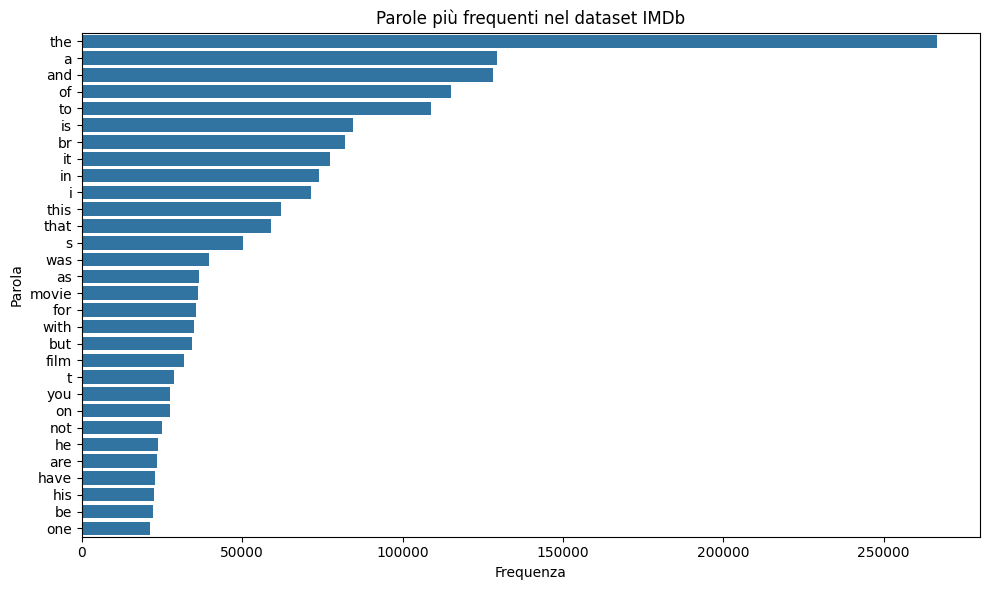

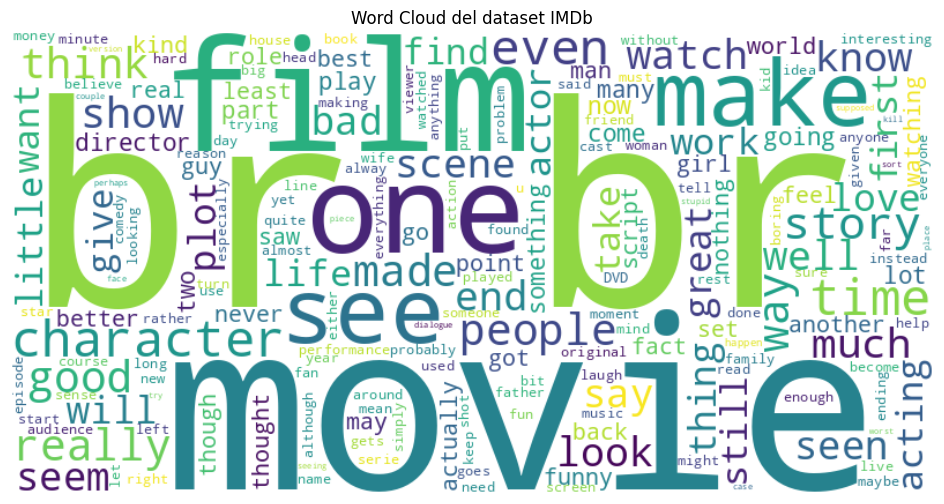

In [1]:
# Import librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import re
from collections import Counter

# Configurazioni
DATASET_PATH = "../artifacts/imdb_sample.csv"
FIGURES_DIR = "figures"

os.makedirs(FIGURES_DIR, exist_ok=True)

# Configurazioni
DATASET_PATH = "../artifacts/imdb_sample.csv"
FIGURES_DIR = "figures"

os.makedirs(FIGURES_DIR, exist_ok=True)

# Carica il dataset
df = pd.read_csv(DATASET_PATH)

print("Primi 5 record:")
display(df.head())

print("\nInformazioni generali sul dataset:")
print(df.info())

# Distribuzione delle etichette
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="label")
plt.title("Distribuzione delle Etichette")
plt.xlabel("Etichetta (0 = Negativo, 1 = Positivo)")
plt.ylabel("Frequenza")
plt.savefig(os.path.join(FIGURES_DIR, "label_distribution.png"))
plt.show()

# Calcola la lunghezza dei testi
df["text_length"] = df["text"].apply(len)

# Grafico distribuzione
plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribuzione della lunghezza dei testi")
plt.xlabel("Numero di caratteri")
plt.ylabel("Frequenza")
plt.axvline(df["text_length"].mean(), color="red", linestyle="--", label=f"Lunghezza media: {df['text_length'].mean():.1f}")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "text_length_distribution.png"))
plt.show()

# Statistiche sulla lunghezza
print(f"\nLunghezza minima: {df['text_length'].min()}")
print(f"Lunghezza massima: {df['text_length'].max()}")
print(f"Lunghezza media: {df['text_length'].mean():.1f} caratteri")

# Parole più comuni
def extract_words(text):
    return re.findall(r'\w+', text.lower())

all_words = []
for text in df["text"]:
    all_words.extend(extract_words(text))

word_counts = Counter(all_words).most_common(30)
words_df = pd.DataFrame(word_counts, columns=["Parola", "Frequenza"])

# Barplot parole più frequenti
plt.figure(figsize=(10, 6))
sns.barplot(data=words_df, x="Frequenza", y="Parola", orient="h")
plt.title("Parole più frequenti nel dataset IMDb")
plt.xlabel("Frequenza")
plt.ylabel("Parola")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "top_words.png"))
plt.show()

# Crea una stringa unica con tutto il testo
text_combined = " ".join(df["text"])

# Genera il word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_combined)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud del dataset IMDb")
plt.savefig(os.path.join(FIGURES_DIR, "wordcloud.png"))
plt.show()